In [ ]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader import DataReader
# For time stamps
from datetime import datetime
# For division
from __future__ import division
#For data source
!pip install yfinance
import yfinance as yf
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
sns.set_style('whitegrid')
plt.style.use('ggplot')

In [ ]:
# Download closing prices of MSFT, GOOGL, TLW.L, TSLA
data = yf.download("MSFT GOOGL TLW.L TSLA", start="2019-03-15", end="2022-03-15")['Close'].reset_index()
#data = yf.download("MSFT GOOGL TLW.L TSLA", start="2021-03-15", end="2022-03-15")
data.head()

[*********************100%***********************]  4 of 4 completed


,Date,GOOGL,MSFT,TLW.L,TSLA
0,2019-03-15,1190.300049,115.910004,232.899994,55.085999
1,2019-03-18,1188.550049,117.570000,232.199997,53.897999
2,2019-03-19,1202.459961,117.650002,237.000000,53.493999
3,2019-03-20,1226.430054,117.519997,238.000000,54.720001
4,2019-03-21,1236.130005,120.220001,241.199997,54.804001


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    772 non-null    datetime64[ns]
 1   GOOGL   756 non-null    float64       
 2   MSFT    756 non-null    float64       
 3   TLW.L   757 non-null    float64       
 4   TSLA    756 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 30.3 KB


Daily Return Analysis

In [ ]:
GOOGL=data['GOOGL'].fillna(method='bfill')
MSFT=data['MSFT'].fillna(method='bfill')
TLW=data['TLW.L'].fillna(method='bfill')
TSLA=data['TSLA'].fillna(method='bfill')

data_GOOGL_return = data['GOOGL_DailyChange']=GOOGL.pct_change(1).fillna(0)
data_MSFT_return = data['MSFT_DailyChange']=MSFT.pct_change(1).fillna(0)
data_TLW_return = data['TLW_DailyChange']=TLW.pct_change(1).fillna(0)
data_TSLA_return = data['TSLA_DailyChange']=TSLA.pct_change(1).fillna(0)

**The probability distribution of returns**

We are now going to calculate some insights about the probability distribution of returns.

**Histogram and boxplot **

Let’s make a first raw histogram of returns.

The return from one day to another one is the percentage change of the closing price between the two days.

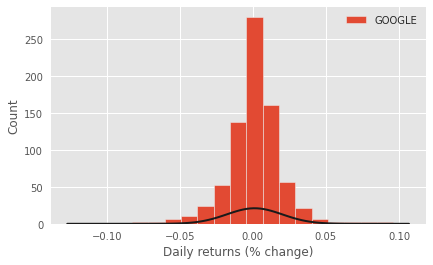

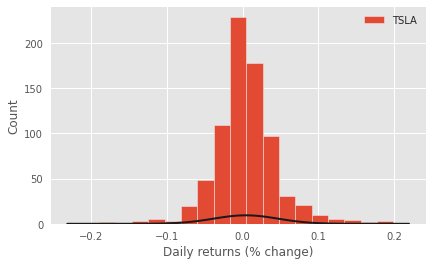

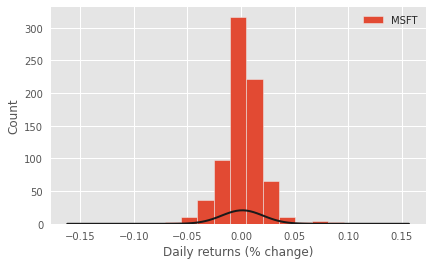

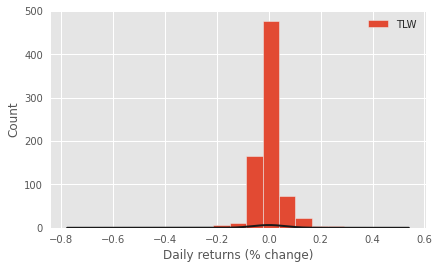

In [ ]:
#density=True keeps the same property (area under curve sums to 1) and is more meaningful and useful.

plt.hist(data_GOOGL_return,bins="rice", label="GOOGLE")
plt.xlabel("Daily returns (% change)") 
plt.ylabel("Count")
mu, std = norm.fit(data_GOOGL_return)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth = 2)
plt.legend()
plt.show()

plt.hist(data_TSLA_return,bins="rice", label="TSLA")
plt.xlabel("Daily returns (% change)") 
plt.ylabel("Count")
mu, std = norm.fit(data_TSLA_return)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth = 2)
plt.legend()
plt.show()

plt.hist(data_MSFT_return,bins="rice", label="MSFT")
plt.xlabel("Daily returns (% change)") 
plt.ylabel("Count")
mu, std = norm.fit(data_MSFT_return)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth = 2)
plt.legend()
plt.show()

plt.hist(data_TLW_return,bins="rice", label="TLW")
plt.xlabel("Daily returns (% change)") 
plt.ylabel("Count")
mu, std = norm.fit(data_TLW_return)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth = 2)
plt.legend()
plt.show()

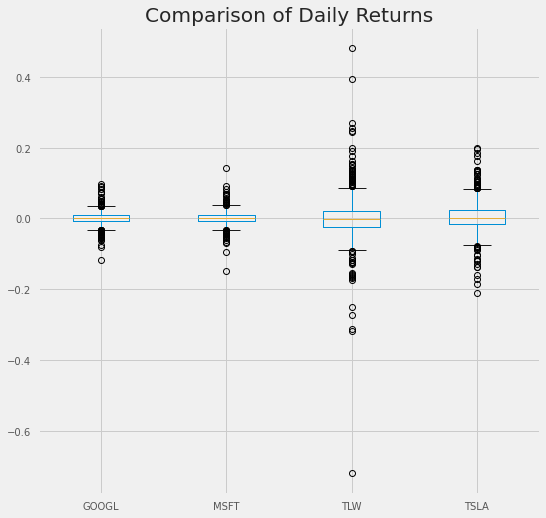

In [ ]:
data_Ret = pd.DataFrame({'GOOGL':data_GOOGL_return,'MSFT': data_MSFT_return,'TLW': data_TLW_return,'TSLA': data_TSLA_return,})
data_Ret.boxplot(figsize=(8,8));
plt.title('Comparison of Daily Returns')
plt.style.use('fivethirtyeight')
plt.show()

Main observables

Calculating some observables of the dataset.

In [ ]:
print('                            GOOGLE                 MICROSOFT              TULLOW OIL PLC                TESLA')
print('Mean', '              |', np.mean(data_GOOGL_return),' |', np.mean(data_MSFT_return),'|', np.mean(data_TLW_return), ' |',np.mean(data_TSLA_return),'|',)
print('Standard Deviation', '|', np.std(data_GOOGL_return),' |', np.std(data_MSFT_return),' |', np.std(data_TLW_return), '   |', np.std(data_TSLA_return),' |',)
print('Median', '            |', np.quantile(data_GOOGL_return, 0.5),' |', np.quantile(data_MSFT_return, 0.5),'|', np.quantile(data_TLW_return, 0.5), '|',np.quantile(data_TSLA_return, 0.5),' |',)
print('Skew', '              |', skew(data_GOOGL_return),'|', skew(data_MSFT_return),' |', skew(data_TLW_return), '   |', skew(data_TSLA_return),'  |',)
print('Kurtosis', '          |', kurtosis(data_GOOGL_return),'    |', kurtosis(data_MSFT_return),'   |', kurtosis(data_TLW_return), '    |', kurtosis(data_TSLA_return),'    |',)

                            GOOGLE                 MICROSOFT              TULLOW OIL PLC                TESLA
Mean               | 0.001151655211145992  | 0.0013132571183400686 | 0.0003210613786325023  | 0.0043164163239219335 |
Standard Deviation | 0.018974840480284135  | 0.019306375405365877  | 0.06313507884282556    | 0.042508120731744654  |
Median             | 0.001211982022321756  | 0.0009614670167215067 | -0.0013050097787762893 | 0.001786581378231622  |
Skew               | -0.014268129143828414 | -0.06955820116396297  | -1.0441511927151863    | 0.18843418219303773   |
Kurtosis           | 5.722700870774153     | 10.332321519827106    | 30.353741920750196     | 4.187673280109644     |


In [ ]:
print('                                        SKEW TEST                                                                       KURTOSIS TEST')
print('GOOG',' |', skewtest(data_GOOGL_return),'  |', kurtosistest(data_GOOGL_return),'  |')
print('MSFT',' |', skewtest(data_MSFT_return),'   |', kurtosistest(data_MSFT_return),'|')
print('TLW','  |', skewtest(data_TLW_return),'|', kurtosistest(data_TLW_return),' |')
print('TSLA',' |', skewtest(data_TSLA_return),'   |', kurtosistest(data_TSLA_return),'  |')

                                        SKEW TEST                                                                       KURTOSIS TEST
GOOG  | SkewtestResult(statistic=-0.16337406562341764, pvalue=0.8702239211588577)   | KurtosistestResult(statistic=10.117373036923025, pvalue=4.62666710555297e-24)   |
MSFT  | SkewtestResult(statistic=-0.7955671357165445, pvalue=0.4262836748134339)    | KurtosistestResult(statistic=12.224992687239475, pvalue=2.2860226901891654e-34) |
TLW   | SkewtestResult(statistic=-9.998939013392866, pvalue=1.5403852585982562e-23) | KurtosistestResult(statistic=15.507867963586428, pvalue=3.069013057555819e-54)  |
TSLA  | SkewtestResult(statistic=2.1395418958617713, pvalue=0.03239180663130027)    | KurtosistestResult(statistic=8.956606788745795, pvalue=3.348231478937837e-19)   |


In [ ]:
print('GOOG',' |', skewtest(data_GOOGL_return),'      |','\n' '      |', kurtosistest(data_GOOGL_return),'  |')
print('      |                                                                                 |')
print('MSFT',' |', skewtest(data_MSFT_return),'       |',  '\n''      |', kurtosistest(data_MSFT_return),'|')
print('      |                                                                                 |')
print('TLW','  |', skewtest(data_TLW_return),'    |','\n''      |', kurtosistest(data_TLW_return),' |')
print('      |                                                                                 | ')
print('TSLA',' |', skewtest(data_TSLA_return),'       |',' \n''      |', kurtosistest(data_TSLA_return),'  |')

GOOG  | SkewtestResult(statistic=-0.16337406562341764, pvalue=0.8702239211588577)       | 
      | KurtosistestResult(statistic=10.117373036923025, pvalue=4.62666710555297e-24)   |
      |                                                                                 |
MSFT  | SkewtestResult(statistic=-0.7955671357165445, pvalue=0.4262836748134339)        | 
      | KurtosistestResult(statistic=12.224992687239475, pvalue=2.2860226901891654e-34) |
      |                                                                                 |
TLW   | SkewtestResult(statistic=-9.998939013392866, pvalue=1.5403852585982562e-23)     | 
      | KurtosistestResult(statistic=15.507867963586428, pvalue=3.069013057555819e-54)  |
      |                                                                                 | 
TSLA  | SkewtestResult(statistic=2.1395418958617713, pvalue=0.03239180663130027)        |  
      | KurtosistestResult(statistic=8.956606788745795, pvalue=3.348231478937837e-19)   |


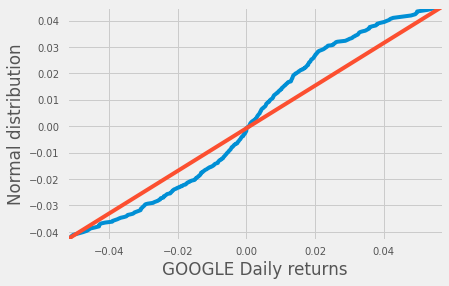

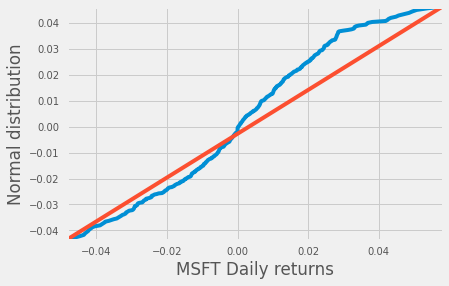

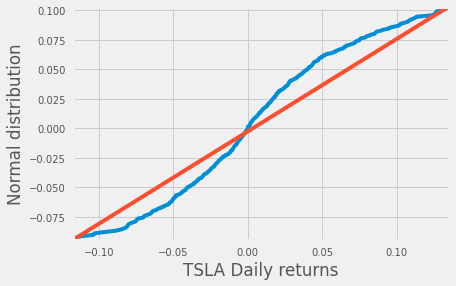

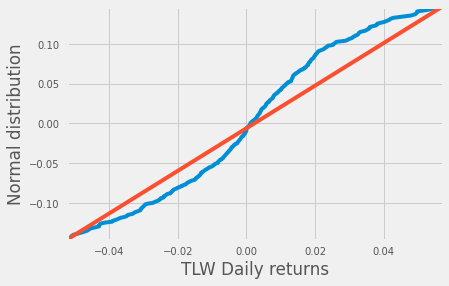

In [ ]:
# Q-Q Plot:

t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(data_GOOGL_return,t)
q2 = norm.ppf(t,loc=np.mean(data_GOOGL_return),scale=np.std(data_GOOGL_return))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("GOOGLE Daily returns")
plt.ylabel("Normal distribution")
plt.show()

t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(data_MSFT_return,t)
q2 = norm.ppf(t,loc=np.mean(data_MSFT_return),scale=np.std(data_MSFT_return))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("MSFT Daily returns")
plt.ylabel("Normal distribution")
plt.show()

t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(data_TSLA_return,t)
q2 = norm.ppf(t,loc=np.mean(data_TSLA_return),scale=np.std(data_TSLA_return))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("TSLA Daily returns")
plt.ylabel("Normal distribution")
plt.show()

t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(data_GOOGL_return,t)
q2 = norm.ppf(t,loc=np.mean(data_TLW_return),scale=np.std(data_TLW_return))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("TLW Daily returns")
plt.ylabel("Normal distribution")
plt.show()


In [ ]:
#Volatility Analysis
GOOGL=data['GOOGL'].fillna(method='bfill')
MSFT=data['MSFT'].fillna(method='bfill')
TLW=data['TLW.L'].fillna(method='bfill')
TSLA=data['TSLA'].fillna(method='bfill')

data['GOOGL_DailyChange']=GOOGL.pct_change(1).fillna(0)
data['MSFT_DailyChange']=MSFT.pct_change(1).fillna(0)
data['TLW_DailyChange']=TLW.pct_change(1).fillna(0)
data['TSLA_DailyChange']=TSLA.pct_change(1).fillna(0)

data_vol_GOOGL = data['GOOGL_DailyChange'].rolling(2).std().fillna(0)
data_vol_MSFT = data['MSFT_DailyChange'].rolling(2).std().fillna(0)
data_vol_TLW = data['TLW_DailyChange'].rolling(2).std().fillna(0)
data_vol_TSLA = data['TSLA_DailyChange'].rolling(2).std().fillna(0)

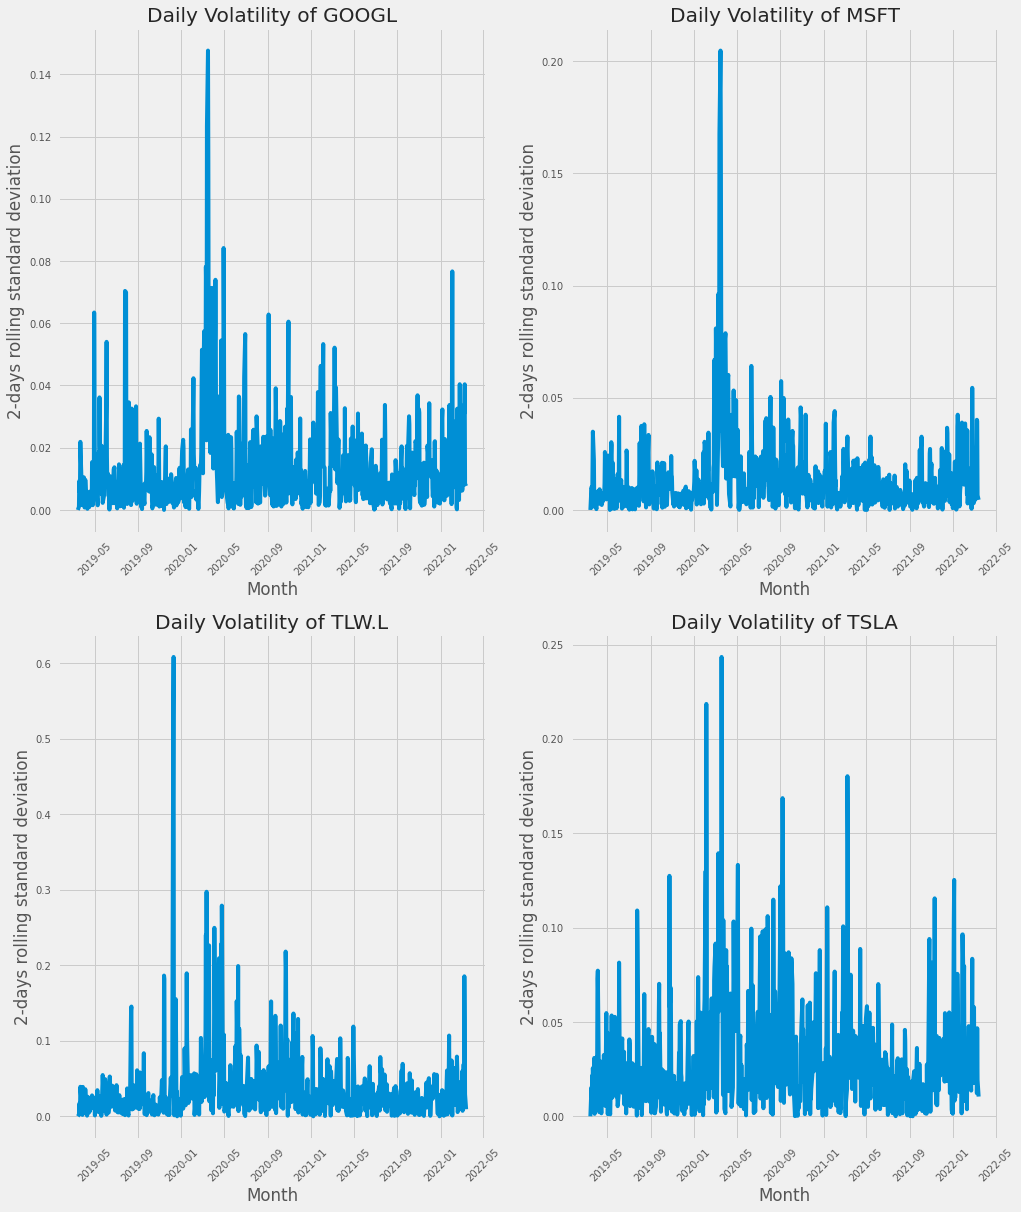

In [ ]:
from IPython.core.pylabtools import figsize
fig, ax = plt.subplots(2,2,figsize=(15,8))

# GOOGL
ax[0,0].plot(data['Date'],data_vol_GOOGL)
ax[0,0].set_xlabel('Month')
ax[0,0].tick_params(axis="x", rotation=45)
ax[0,0].set_ylabel('2-days rolling standard deviation')
ax[0,0].set_title('Daily Volatility of GOOGL')

# MSFT
ax[0,1].plot(data['Date'],data_vol_MSFT)
ax[0,1].set_xlabel('Month')
ax[0,1].tick_params(axis="x", rotation=45)
ax[0,1].set_ylabel('2-days rolling standard deviation')
ax[0,1].set_title('Daily Volatility of MSFT')

# TLW.L
ax[1,0].plot(data['Date'],data_vol_TLW)
ax[1,0].set_xlabel('Month')
ax[1,0].tick_params(axis="x", rotation=45)
ax[1,0].set_ylabel('2-days rolling standard deviation')
ax[1,0].set_title('Daily Volatility of TLW.L')

# TSLA
ax[1,1].plot(data['Date'],data_vol_TSLA)
ax[1,1].set_xlabel('Month')
ax[1,1].tick_params(axis="x", rotation=45)
ax[1,1].set_ylabel('2-days rolling standard deviation')
ax[1,1].set_title('Daily Volatility of TSLA')

plt.subplots_adjust(top=2)
plt.show()

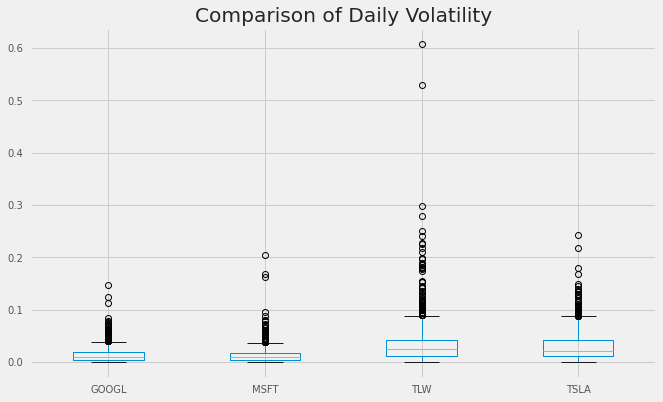

In [ ]:
data_vol = pd.DataFrame({'GOOGL':data_vol_GOOGL,'MSFT': data_vol_MSFT,'TLW': data_vol_TLW,'TSLA': data_vol_TSLA,})
data_vol.boxplot(figsize=(10,6));
plt.title('Comparison of Daily Volatility')
plt.show()

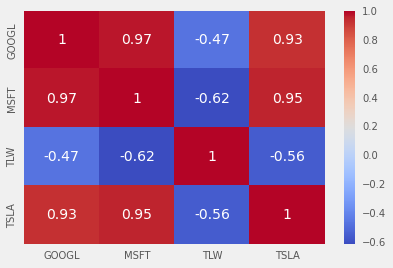

In [ ]:
#Correlation between closing prices of each stock
data_corr_price = pd.DataFrame({'GOOGL':data['GOOGL'], 'MSFT':data['MSFT'],'TLW':data['TLW.L'],'TSLA':data['TSLA']})
sns.heatmap(data_corr_price.corr(),cmap='coolwarm',annot=True);

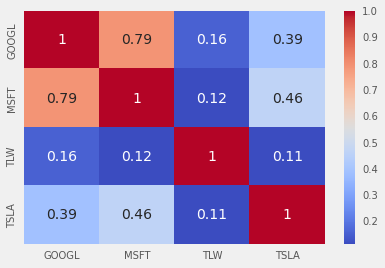

In [ ]:
#Correlation between daily returns of each stock
data_corr_DailyReturn = pd.DataFrame({'GOOGL':data['GOOGL_DailyChange'], 'MSFT':data['MSFT_DailyChange'],'TLW':data['TLW_DailyChange'],'TSLA':data['TSLA_DailyChange']})
sns.heatmap(data_corr_DailyReturn.corr(),cmap='coolwarm',annot=True);

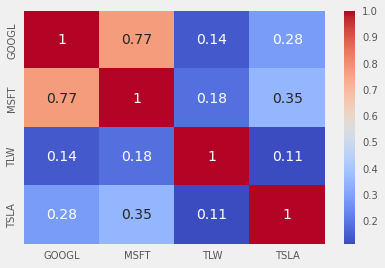

In [ ]:
#Correlation between volatility of daily returns of each stock
data_corr_vol = pd.DataFrame({'GOOGL':data_vol_GOOGL, 'MSFT':data_vol_MSFT,'TLW':data_vol_TLW,'TSLA':data_vol_TSLA})
sns.heatmap(data_corr_vol.corr(),cmap='coolwarm',annot=True);

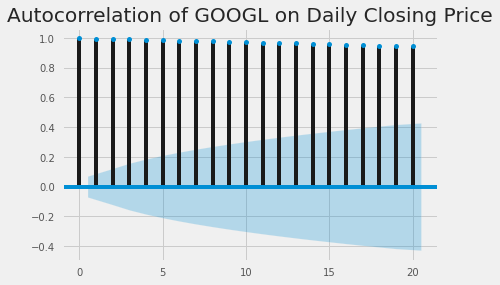

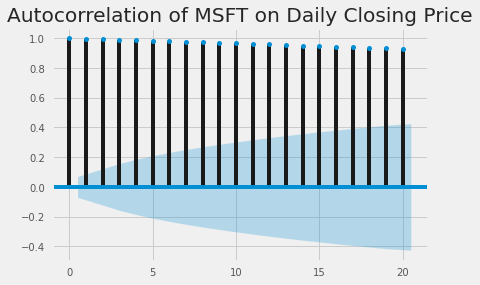

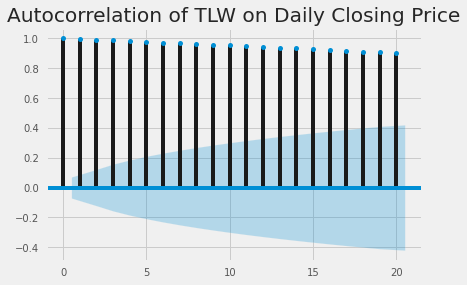

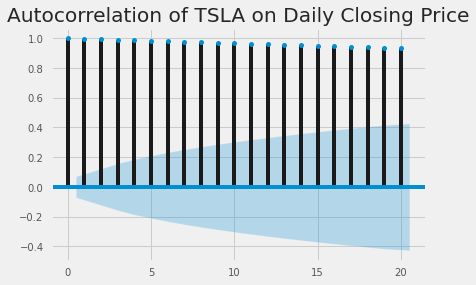

In [ ]:
#Autocorrelation on daily closing prices

# GOOGL
plot_acf(GOOGL, lags=20)
plt.title('Autocorrelation of GOOGL on Daily Closing Price')
plt.show()

#MSFT
plot_acf(MSFT, lags=20)
plt.title('Autocorrelation of MSFT on Daily Closing Price')
plt.show()

#TLW.L
plot_acf(TLW, lags=20)
plt.title('Autocorrelation of TLW on Daily Closing Price')
plt.show()

#TSLA
plot_acf(TSLA, lags=20)
plt.title('Autocorrelation of TSLA on Daily Closing Price')
plt.show()

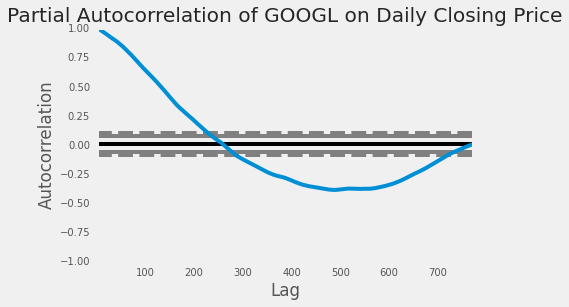

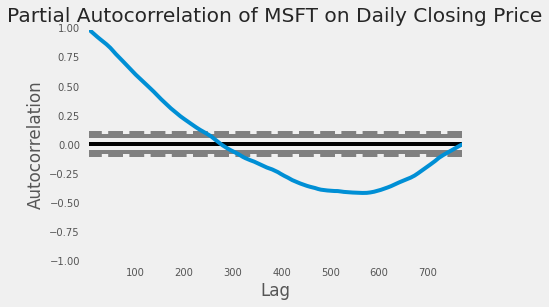

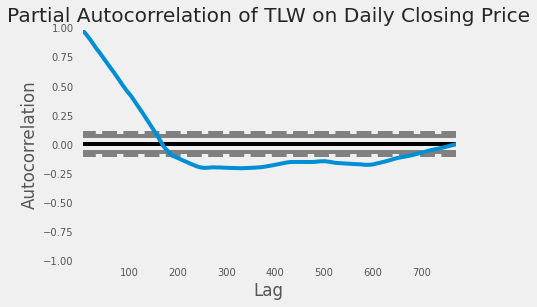

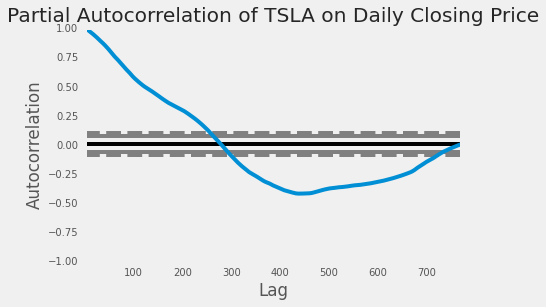

In [ ]:
#Partial Autocorrelation on daily closing prices

# GOOGL
pd.plotting.autocorrelation_plot(GOOGL)
plt.title('Partial Autocorrelation of GOOGL on Daily Closing Price')
plt.show()

# MSFT
pd.plotting.autocorrelation_plot(MSFT)
plt.title('Partial Autocorrelation of MSFT on Daily Closing Price')
plt.show()

# TLW.L
pd.plotting.autocorrelation_plot(TLW)
plt.title('Partial Autocorrelation of TLW on Daily Closing Price')
plt.show()

# TSLA
pd.plotting.autocorrelation_plot(TSLA)
plt.title('Partial Autocorrelation of TSLA on Daily Closing Price')
plt.show()

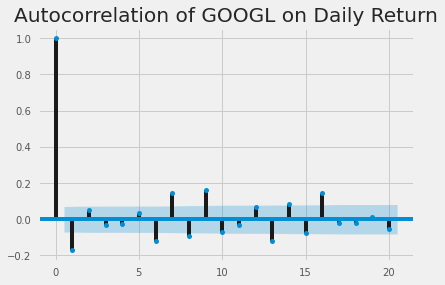

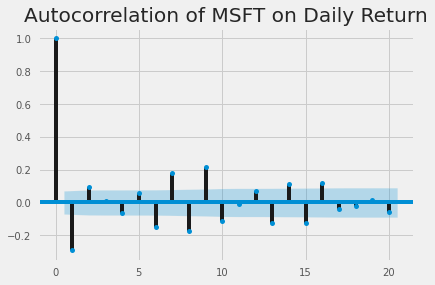

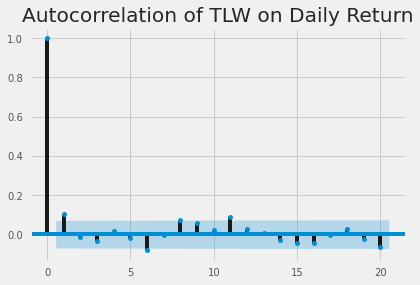

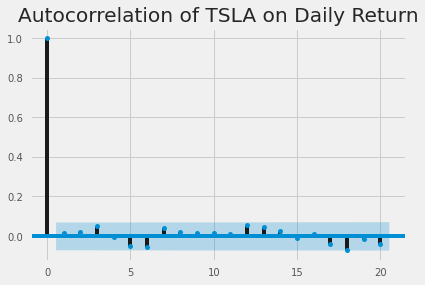

In [ ]:
#Autocorrelation on daily return

# GOOGL
plot_acf(data['GOOGL_DailyChange'], lags=20)
plt.title('Autocorrelation of GOOGL on Daily Return')
plt.show()

#MSFT
plot_acf(data['MSFT_DailyChange'], lags=20)
plt.title('Autocorrelation of MSFT on Daily Return')
plt.show()

#TLW.L
plot_acf(data['TLW_DailyChange'], lags=20)
plt.title('Autocorrelation of TLW on Daily Return')
plt.show()

#TSLA
plot_acf(data['TSLA_DailyChange'], lags=20)
plt.title('Autocorrelation of TSLA on Daily Return')
plt.show()

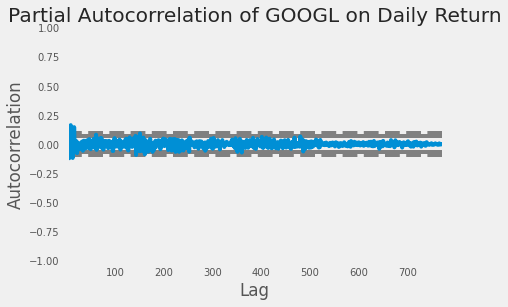

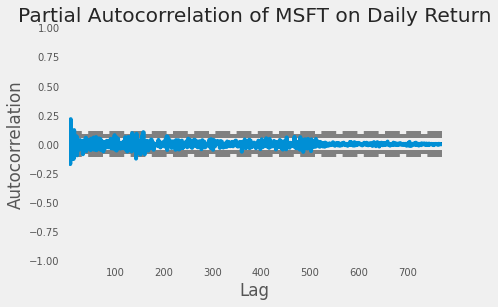

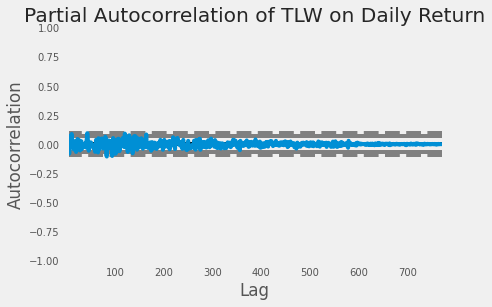

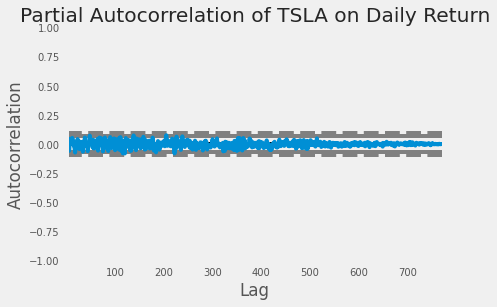

In [ ]:
#Partial Autocorrelation on daily return

# GOOGL
pd.plotting.autocorrelation_plot(data['GOOGL_DailyChange'])
plt.title('Partial Autocorrelation of GOOGL on Daily Return')
plt.show()

# MSFT
pd.plotting.autocorrelation_plot(data['MSFT_DailyChange'])
plt.title('Partial Autocorrelation of MSFT on Daily Return')
plt.show()

# TLW.L
pd.plotting.autocorrelation_plot(data['TLW_DailyChange'])
plt.title('Partial Autocorrelation of TLW on Daily Return')
plt.show()

# TSLA
pd.plotting.autocorrelation_plot(data['TSLA_DailyChange'])
plt.title('Partial Autocorrelation of TSLA on Daily Return')
plt.show()

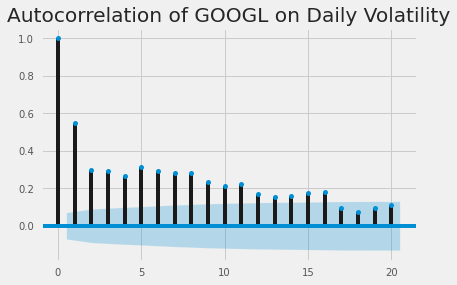

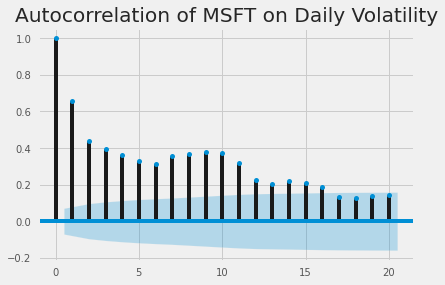

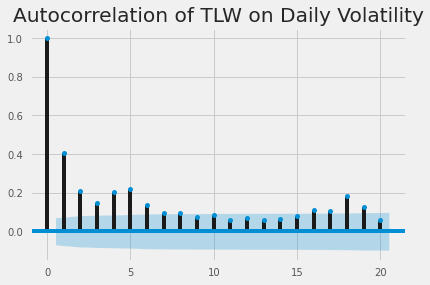

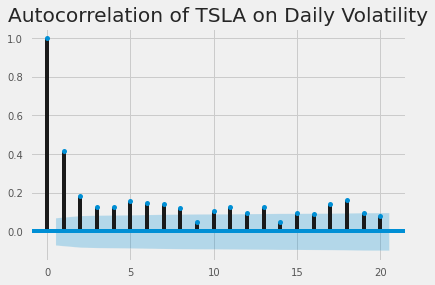

In [ ]:
#Autocorrelation on daily volatility

# GOOGL
plot_acf(data_vol_GOOGL, lags=20)
plt.title('Autocorrelation of GOOGL on Daily Volatility')
plt.show()

#MSFT
plot_acf(data_vol_MSFT, lags=20)
plt.title('Autocorrelation of MSFT on Daily Volatility')
plt.show()

#TLW.L
plot_acf(data_vol_TLW, lags=20)
plt.title('Autocorrelation of TLW on Daily Volatility')
plt.show()

#TSLA
plot_acf(data_vol_TSLA, lags=20)
plt.title('Autocorrelation of TSLA on Daily Volatility')
plt.show()

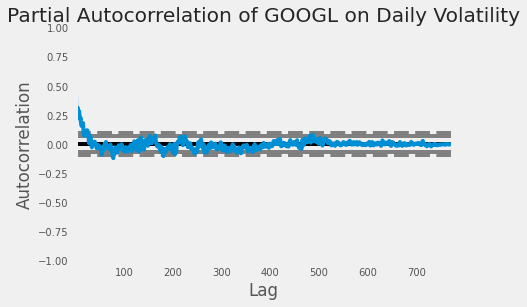

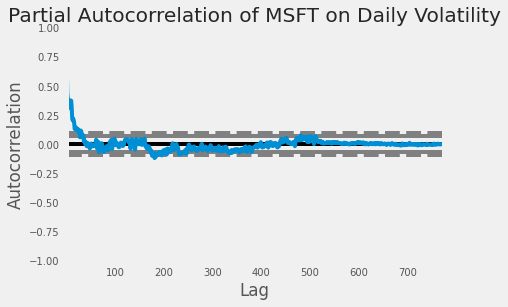

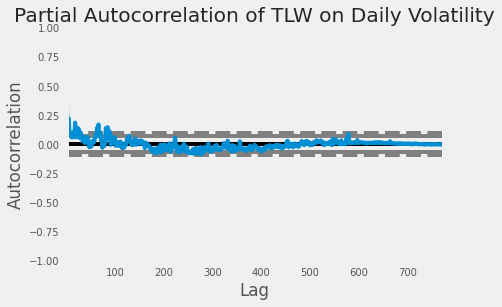

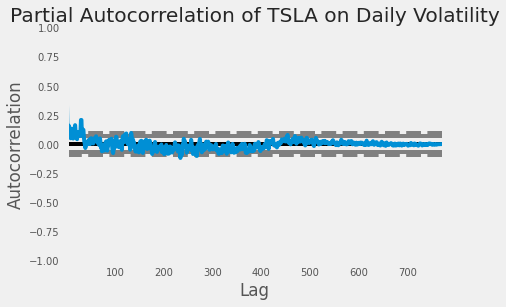

In [ ]:
#Partial Autocorrelation on daily volatility

# GOOGL
pd.plotting.autocorrelation_plot(data_vol_GOOGL)
plt.title('Partial Autocorrelation of GOOGL on Daily Volatility')
plt.show()

# MSFT
pd.plotting.autocorrelation_plot(data_vol_MSFT)
plt.title('Partial Autocorrelation of MSFT on Daily Volatility')
plt.show()

# TLW.L
pd.plotting.autocorrelation_plot(data_vol_TLW)
plt.title('Partial Autocorrelation of TLW on Daily Volatility')
plt.show()

# TSLA
pd.plotting.autocorrelation_plot(data_vol_TSLA)
plt.title('Partial Autocorrelation of TSLA on Daily Volatility')
plt.show()

In [ ]:
#downloading the data for each stock seperately in order for the values to unpack
df1 = yf.download('GOOGL', start='2020-03-15', end='2022-03-15')

[*********************100%***********************]  1 of 1 completed


In [ ]:
y = df1['Adj Close']

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.644897
p-value: 0.459703
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


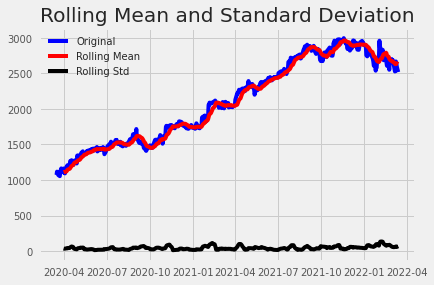

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.rcParams["figure.figsize"] = (8,4)
    plt.show(block=False)
test_stationarity(y)

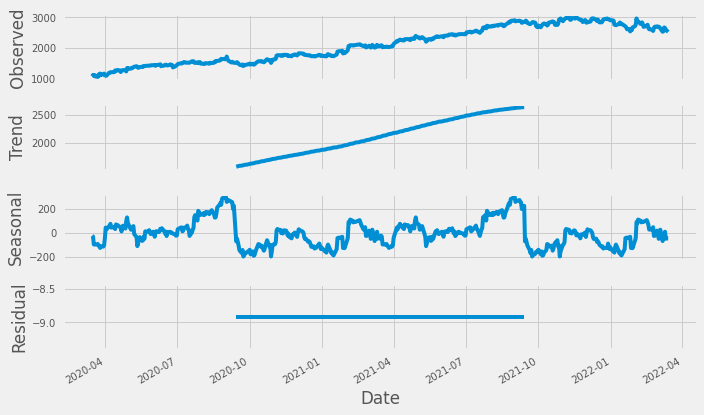

In [ ]:
import statsmodels.api
import statsmodels as sm

res = sm.tsa.seasonal.seasonal_decompose(y, model='additive', freq=252)
plt.rcParams["figure.figsize"] = (10,6)

resplot = res.plot()

<Figure size 288x720 with 0 Axes>

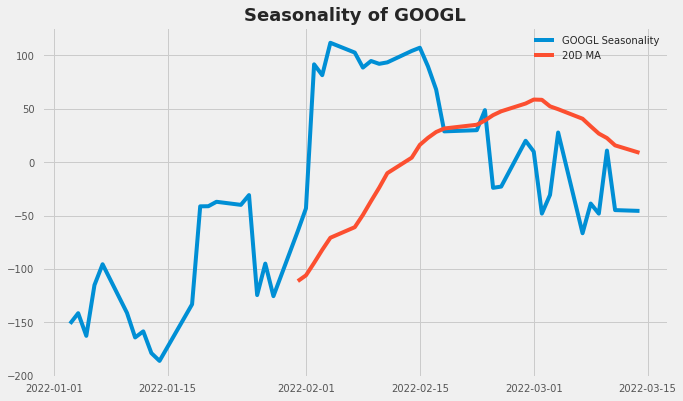

<Figure size 288x720 with 0 Axes>

In [ ]:
y_Seasonality=res.seasonal[res.seasonal.index.year == 2022]
MA1=y_Seasonality.rolling(window=20).mean()
plt.plot(y_Seasonality, label='GOOGL Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of GOOGL", fontsize=18, fontweight='bold')
plt.legend()
plt.figure(figsize=(4,10))

<Figure size 288x720 with 0 Axes>

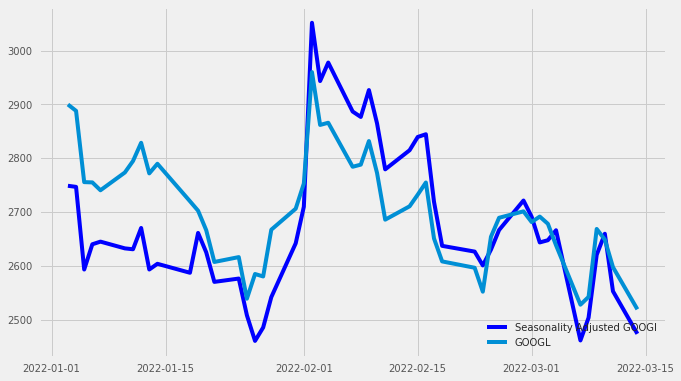

<Figure size 288x720 with 0 Axes>

In [ ]:
plt.plot(y[y.index.year == 2022]+y_Seasonality,color='blue',label='Seasonality Adjusted GOOGl');
plt.plot(y[y.index.year == 2022],label='GOOGL')
plt.legend(loc=4)
plt.figure(figsize=(4,10))

<Figure size 720x288 with 0 Axes>

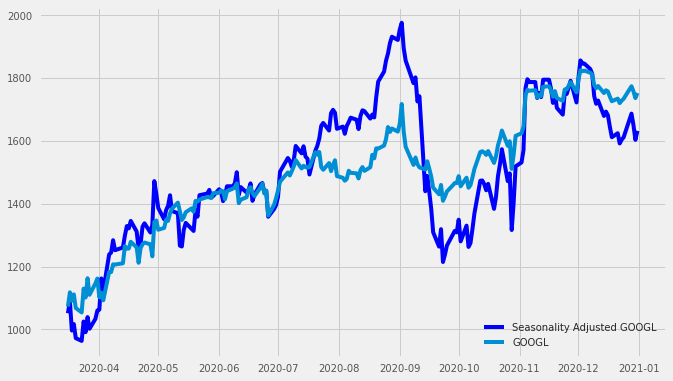

<Figure size 720x288 with 0 Axes>

In [ ]:
plt.plot(y[y.index.year == 2020]+res.seasonal[res.seasonal.index.year == 2020],color='blue',label='Seasonality Adjusted GOOGL');
plt.plot(y[y.index.year == 2020],label='GOOGL')
plt.legend(loc=4)
plt.figure(figsize=(10,4))

In [ ]:
df1['3day MA'] = df1['Adj Close'].shift(1).rolling(window=3).mean()
df1['10day MA'] = df1['Adj Close'].shift(1).rolling(window=10).mean()
df1['30day MA'] = df1['Adj Close'].shift(1).rolling(window=30).mean()
df1['Std_dev'] = df1['Adj Close'].rolling(5).std()
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,3day MA,10day MA,30day MA,Std_dev
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,501.000000,494.000000,474.000000,500.000000
mean,2107.363552,2129.636146,2084.333237,2107.358811,2107.358811,1.754207e+06,2107.559542,2111.111222,2119.313828,30.582377
std,584.730611,586.318821,579.994661,582.631259,582.631259,8.071016e+05,581.341871,576.392164,562.666260,19.615959
min,1056.369995,1066.910034,1008.869995,1054.130005,1054.130005,4.656000e+05,1078.003337,1102.107007,1174.673340,3.157933
25%,1528.085022,1557.277496,1512.144958,1529.819977,1529.819977,1.223500e+06,1531.869995,1532.258749,1545.805249,16.152717
50%,2067.229980,2098.939941,2051.119995,2083.849976,2083.849976,1.550750e+06,2068.326660,2067.434509,2066.680996,25.821105
75%,2708.645020,2730.392456,2678.180054,2706.797546,2706.797546,2.013025e+06,2708.656657,2718.330768,2731.846588,39.509516
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,6.160000e+06,2978.746663,2962.855054,2926.803678,141.757663


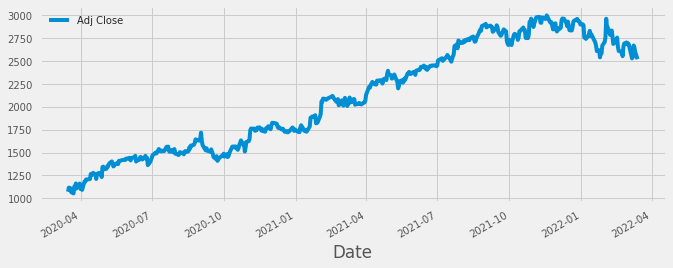

In [ ]:
# Let's see a historical view of the closing price
#We can see a significant upward trend here reflecting a 12-month price increase from 1728.239990 to 2673.810059  
df1['Adj Close'].plot(legend=True, figsize=(10,4))

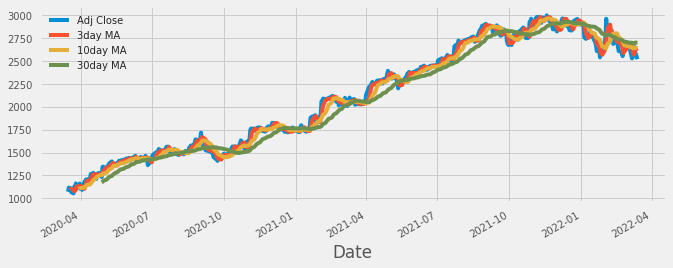

In [ ]:
df1[['Adj Close','3day MA','10day MA','30day MA']].plot(subplots=False,figsize=(10,4))

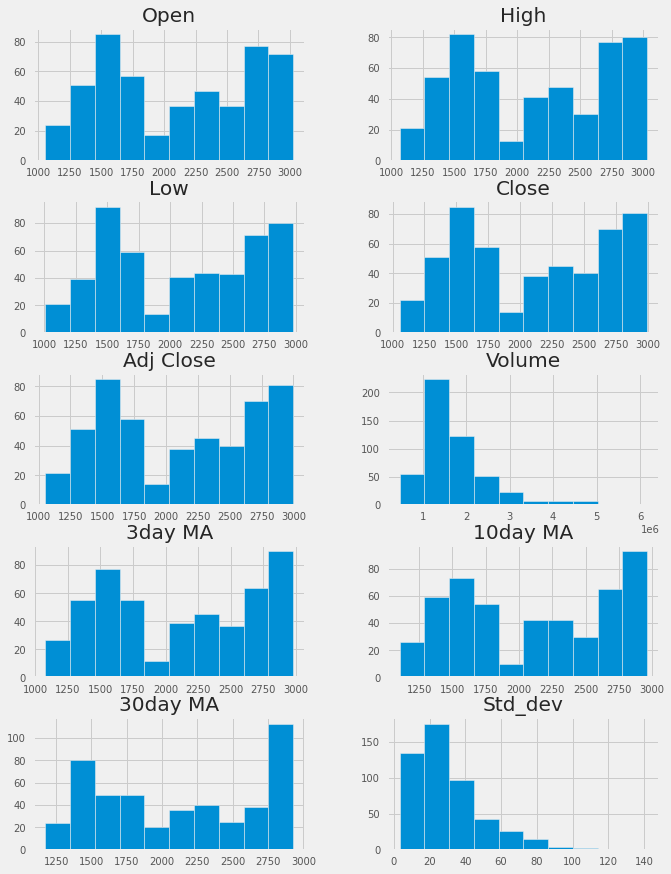

In [ ]:
columns_multi = [x for x in list(df1.columns)]
columns_multi
plt.rcParams['figure.figsize'] = (10,20)
names = columns_multi
df1.hist(layout = (7,2), column = columns_multi)
plt.show()

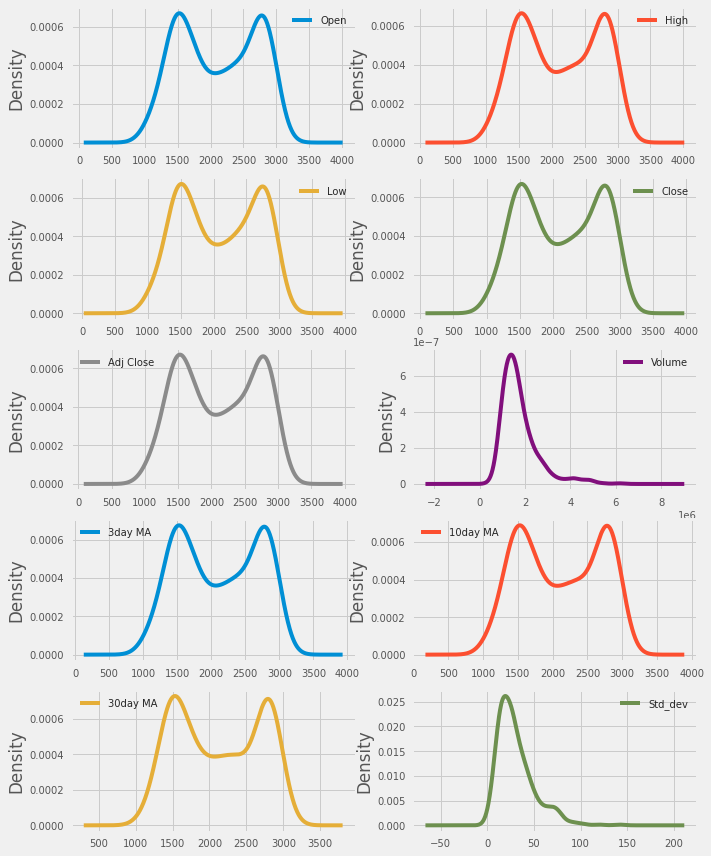

In [ ]:
names = columns_multi
df1.plot(kind='density', subplots=True, layout=(7,2), sharex=False)
plt.show()

In [ ]:
df1 = yf.download('TSLA', start='2020-03-15', end='2022-03-15')
y = df1['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.786187
p-value: 0.387341
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


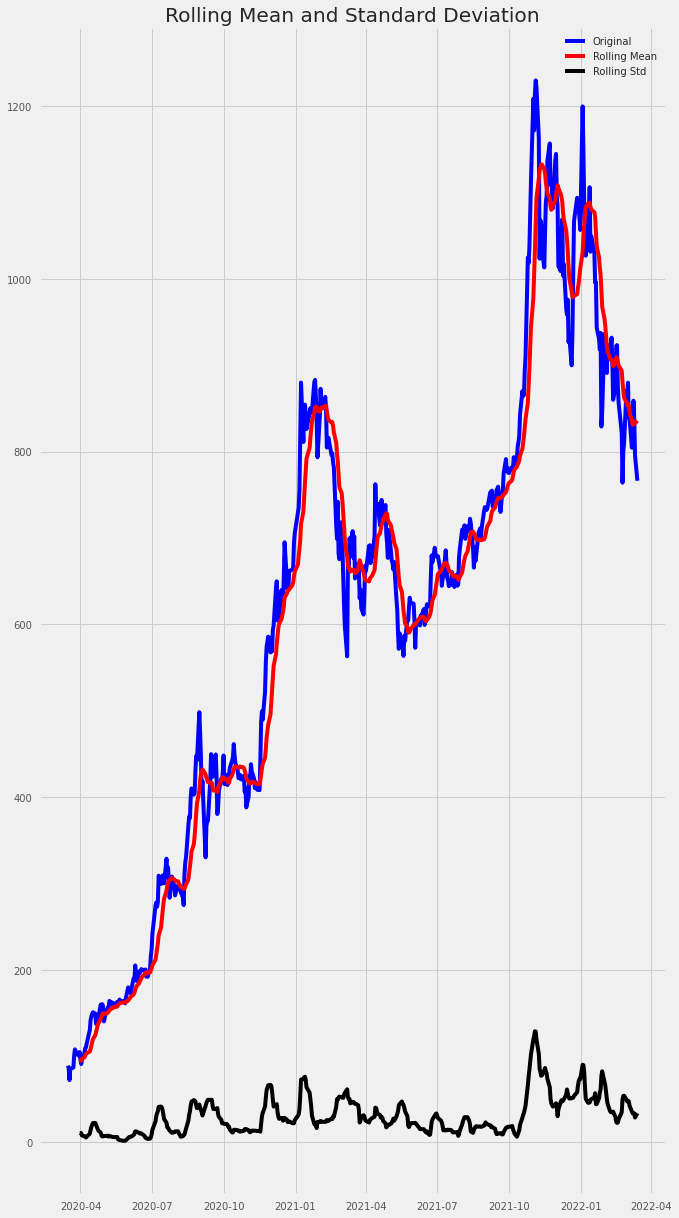

In [ ]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.rcParams["figure.figsize"] = (8,4)
    plt.show(block=False)
test_stationarity(y)

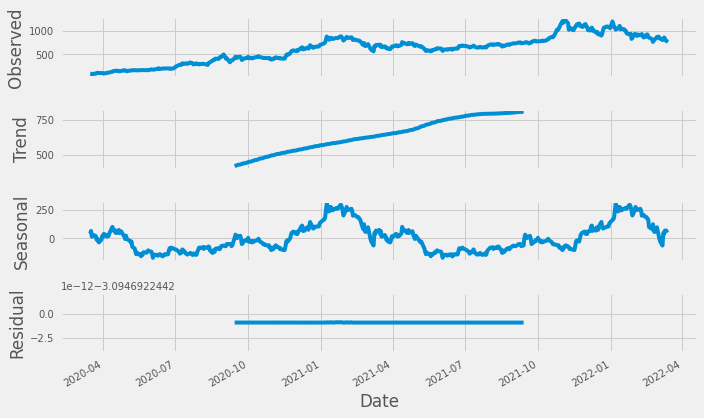

In [ ]:
import statsmodels.api
import statsmodels as sm

res = sm.tsa.seasonal.seasonal_decompose(y, model='additive', freq=252)
plt.rcParams["figure.figsize"] = (10,6)

resplot = res.plot()

<Figure size 288x720 with 0 Axes>

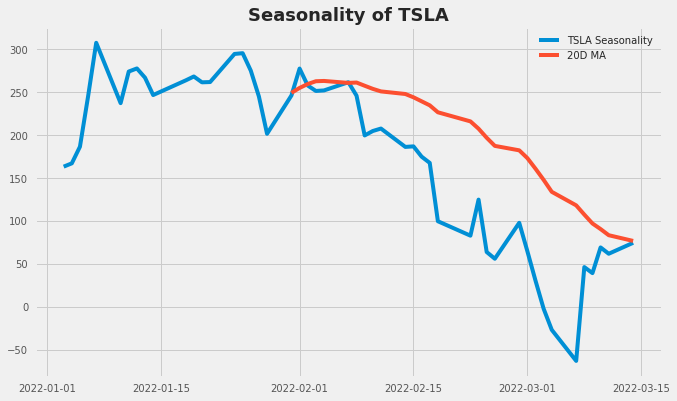

<Figure size 288x720 with 0 Axes>

In [ ]:
y_Seasonality=res.seasonal[res.seasonal.index.year == 2022]
MA1=y_Seasonality.rolling(window=20).mean()
plt.plot(y_Seasonality, label='TSLA Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of TSLA", fontsize=18, fontweight='bold')
plt.legend()
plt.figure(figsize=(4,10))

<Figure size 720x288 with 0 Axes>

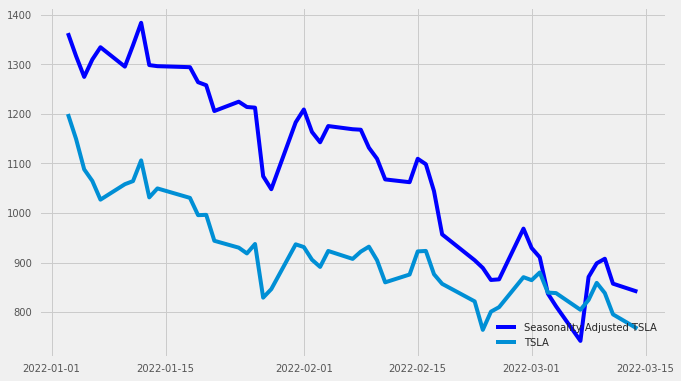

<Figure size 720x288 with 0 Axes>

In [ ]:
plt.plot(y[y.index.year == 2022]+y_Seasonality,color='blue',label='Seasonality Adjusted TSLA');
plt.plot(y[y.index.year == 2022],label='TSLA')
plt.legend(loc=4)
plt.figure(figsize=(10,4))

<Figure size 720x288 with 0 Axes>

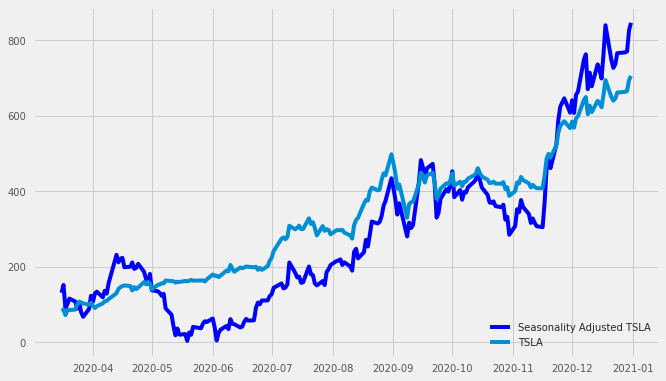

<Figure size 720x288 with 0 Axes>

In [ ]:
plt.plot(y[y.index.year == 2020]+res.seasonal[res.seasonal.index.year == 2020],color='blue',label='Seasonality Adjusted TSLA');
plt.plot(y[y.index.year == 2020],label='TSLA')
plt.legend(loc=4)
plt.figure(figsize=(10,4))

In [ ]:
df1['3day MA'] = df1['Adj Close'].shift(1).rolling(window=3).mean()
df1['10day MA'] = df1['Adj Close'].shift(1).rolling(window=10).mean()
df1['30day MA'] = df1['Adj Close'].shift(1).rolling(window=30).mean()
df1['Std_dev'] = df1['Adj Close'].rolling(5).std()
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,3day MA,10day MA,30day MA,Std_dev
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,501.000000,494.000000,474.000000,500.000000
mean,612.302671,626.280475,596.883381,612.216102,612.216102,4.370525e+07,612.560591,614.707696,620.292285,20.450115
std,285.139223,291.134572,277.921436,284.528466,284.528466,3.019536e+07,283.655357,280.155021,269.771044,15.911683
min,74.940002,80.972000,70.101997,72.244003,72.244003,9.800600e+06,81.092667,92.254401,114.819400,0.940160
25%,409.535507,418.998497,401.915001,409.622002,409.622002,2.276422e+07,412.713999,416.128252,420.360301,8.595921
50%,661.565002,669.200012,644.644989,657.285004,657.285004,3.263630e+07,656.369995,657.366992,665.888166,15.579584
75%,809.539978,819.687500,785.372513,804.640015,804.640015,5.646752e+07,810.866659,809.799995,786.665834,27.992460
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,2.221262e+08,1221.953328,1149.187988,1102.903333,92.336492


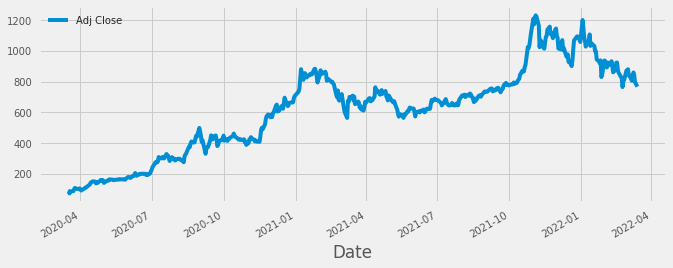

In [ ]:
#Adjusred close price 
df1['Adj Close'].plot(legend=True, figsize=(10,4))

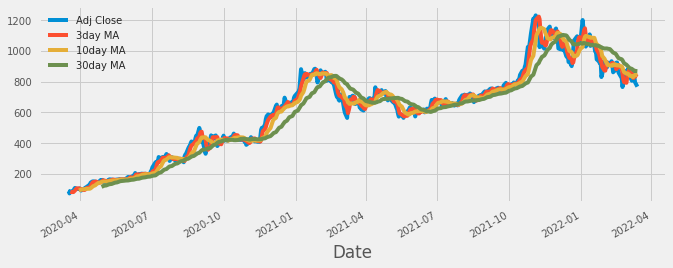

In [ ]:
df1[['Adj Close','3day MA','10day MA','30day MA']].plot(subplots=False,figsize=(10,4))

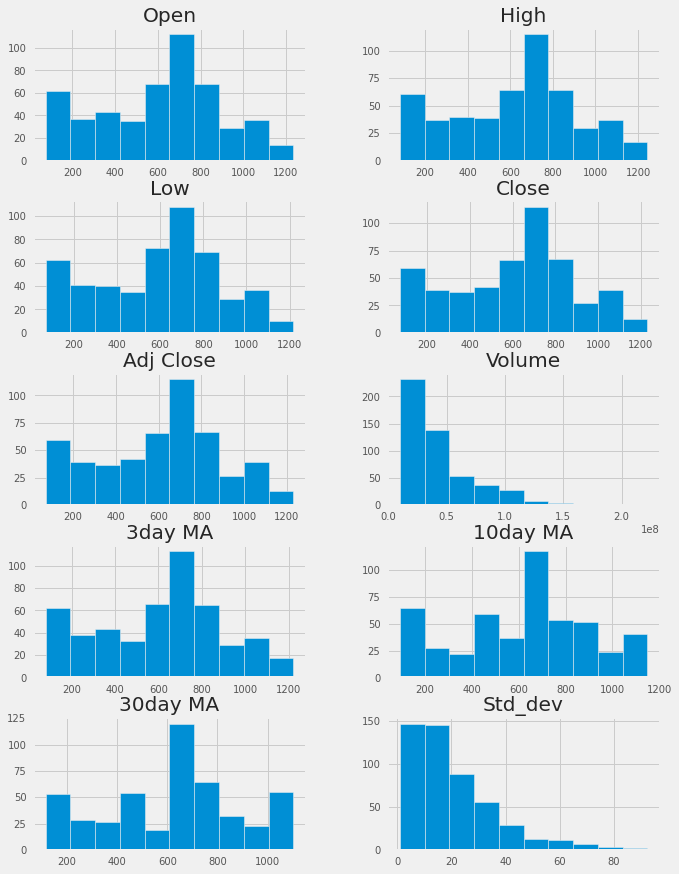

In [ ]:
columns_multi = [x for x in list(df1.columns)]
columns_multi
plt.rcParams['figure.figsize'] = (10,20)
names = columns_multi
df1.hist(layout = (7,2), column = columns_multi)
plt.show()

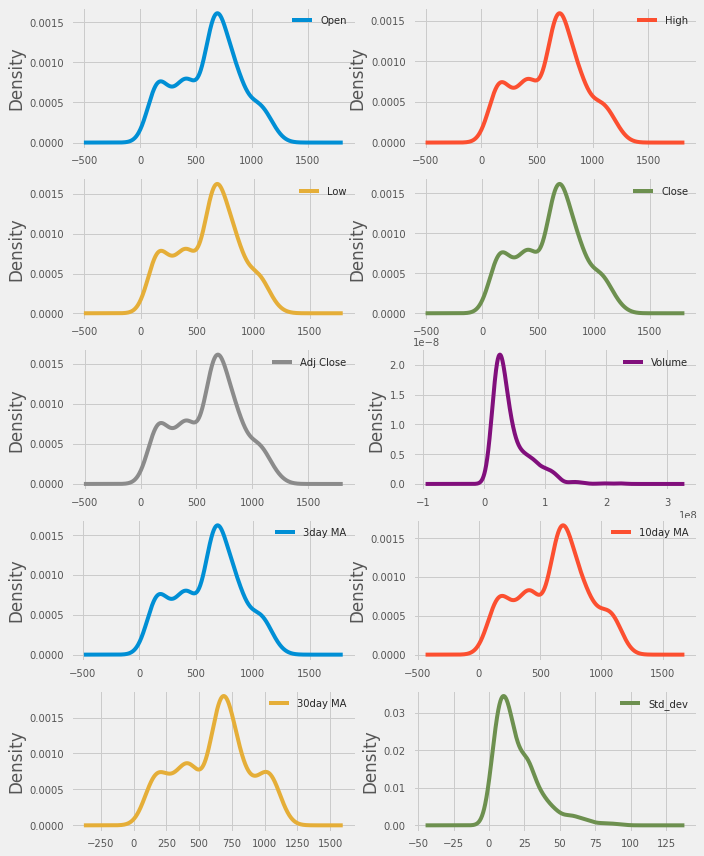

In [ ]:
names = columns_multi
df1.plot(kind='density', subplots=True, layout=(7,2), sharex=False)
plt.show()

In [ ]:
df1 = yf.download('MSFT', start='2020-03-15', end='2022-03-15')
y = df1['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.971435
p-value: 0.299236
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


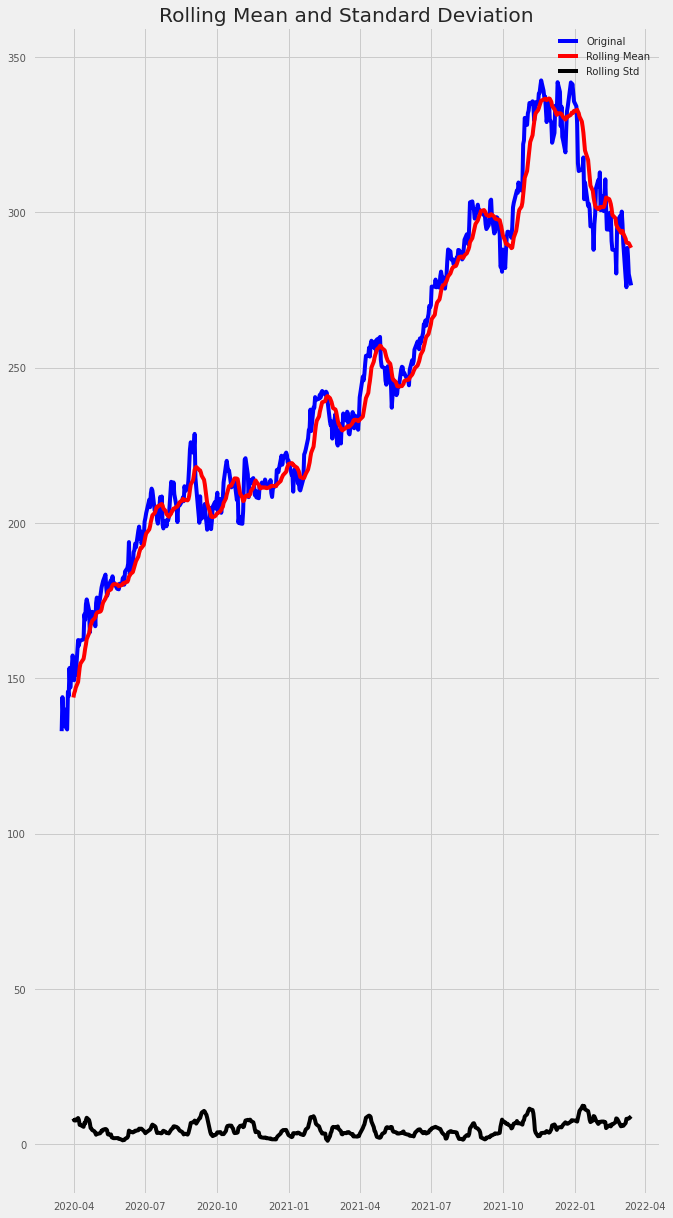

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.rcParams["figure.figsize"] = (8,4)
    plt.show(block=False)
test_stationarity(y)

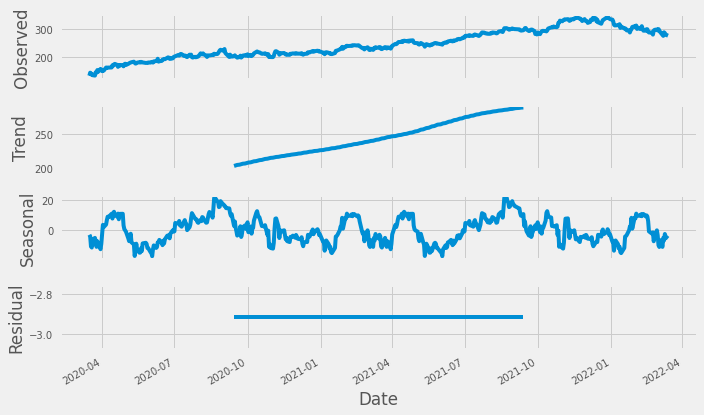

In [ ]:
import statsmodels.api
import statsmodels as sm

res = sm.tsa.seasonal.seasonal_decompose(y, model='additive', freq=252)
plt.rcParams["figure.figsize"] = (10,6)

resplot = res.plot()

<Figure size 288x720 with 0 Axes>

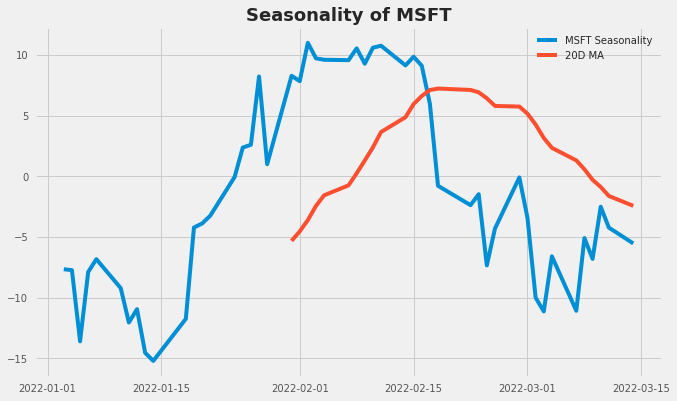

<Figure size 288x720 with 0 Axes>

In [ ]:
y_Seasonality=res.seasonal[res.seasonal.index.year == 2022]
MA1=y_Seasonality.rolling(window=20).mean()
plt.plot(y_Seasonality, label='MSFT Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of MSFT", fontsize=18, fontweight='bold')
plt.legend()
plt.figure(figsize=(4,10))

<Figure size 720x288 with 0 Axes>

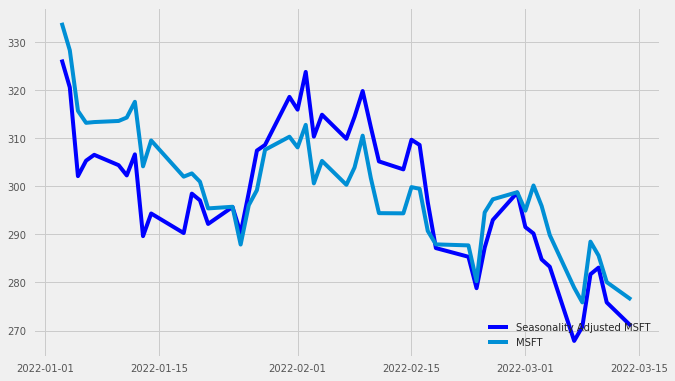

<Figure size 720x288 with 0 Axes>

In [ ]:
plt.plot(y[y.index.year == 2022]+y_Seasonality,color='blue',label='Seasonality Adjusted MSFT');
plt.plot(y[y.index.year == 2022],label='MSFT')
plt.legend(loc=4)
plt.figure(figsize=(10,4))

<Figure size 720x288 with 0 Axes>

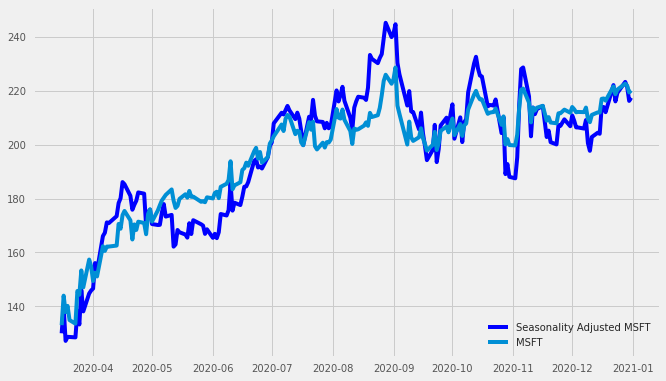

<Figure size 720x288 with 0 Axes>

In [ ]:
plt.plot(y[y.index.year == 2020]+res.seasonal[res.seasonal.index.year == 2020],color='blue',label='Seasonality Adjusted MSFT');
plt.plot(y[y.index.year == 2020],label='MSFT')
plt.legend(loc=4)
plt.figure(figsize=(10,4))

In [ ]:
df1['3day MA'] = df1['Adj Close'].shift(1).rolling(window=3).mean()
df1['10day MA'] = df1['Adj Close'].shift(1).rolling(window=10).mean()
df1['30day MA'] = df1['Adj Close'].shift(1).rolling(window=30).mean()
df1['Std_dev'] = df1['Adj Close'].rolling(5).std()
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,3day MA,10day MA,30day MA,Std_dev
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,501.000000,494.000000,474.000000,500.000000
mean,247.266428,249.843710,244.611052,247.323929,245.362099,3.160347e+07,245.444159,245.911394,246.831683,3.446802
std,50.163809,50.146949,49.870988,50.033676,50.816981,1.320188e+07,50.619067,49.901744,48.189239,1.904039
min,137.009995,140.570007,132.520004,135.419998,132.974548,1.055060e+07,136.175710,141.350526,156.482909,0.485488
25%,210.597496,213.067501,208.157501,210.487503,207.913742,2.290970e+07,207.366333,207.481459,209.171857,2.075399
50%,238.889999,242.739998,238.060005,239.579994,237.118240,2.866265e+07,237.819524,237.201327,235.077590,3.064659
75%,292.247513,295.032494,288.805008,292.930000,291.472954,3.627685e+07,291.810822,292.379282,294.788398,4.559763
max,344.619995,349.670013,342.200012,343.109985,342.402008,9.042890e+07,341.177877,337.421735,334.021113,11.255951


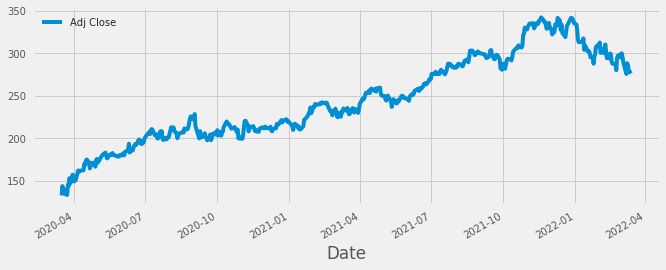

In [ ]:
df1['Adj Close'].plot(legend=True, figsize=(10,4))

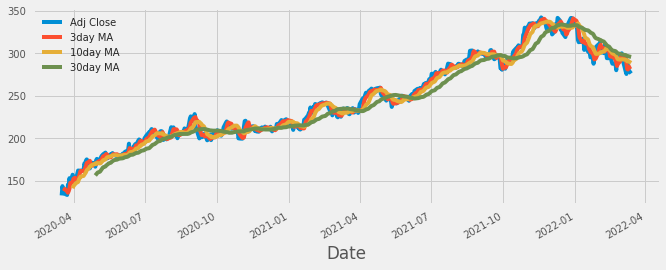

In [ ]:
df1[['Adj Close','3day MA','10day MA','30day MA']].plot(subplots=False,figsize=(10,4))

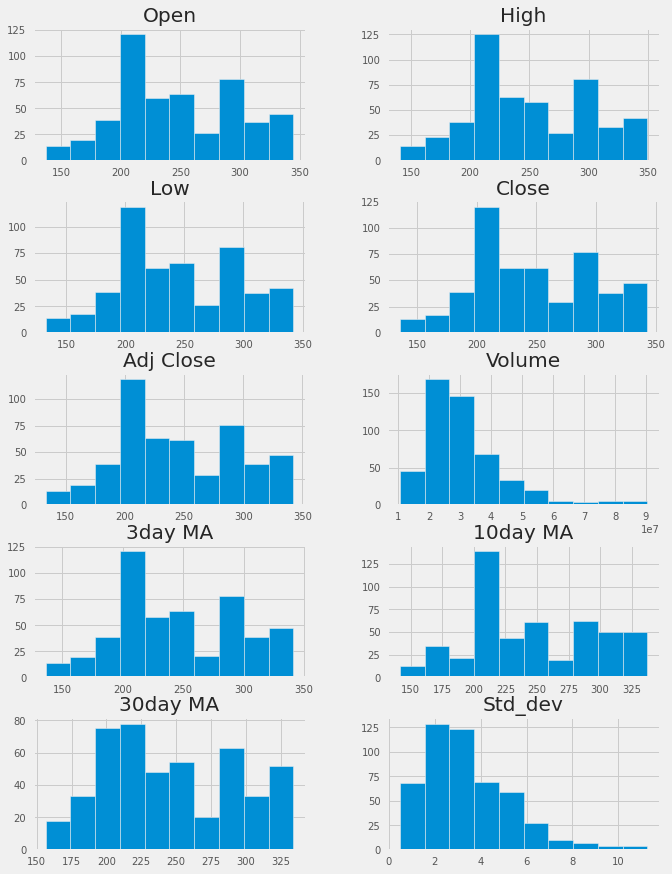

In [ ]:
columns_multi = [x for x in list(df1.columns)]
columns_multi
plt.rcParams['figure.figsize'] = (10,20)
names = columns_multi
df1.hist(layout = (7,2), column = columns_multi)
plt.show()

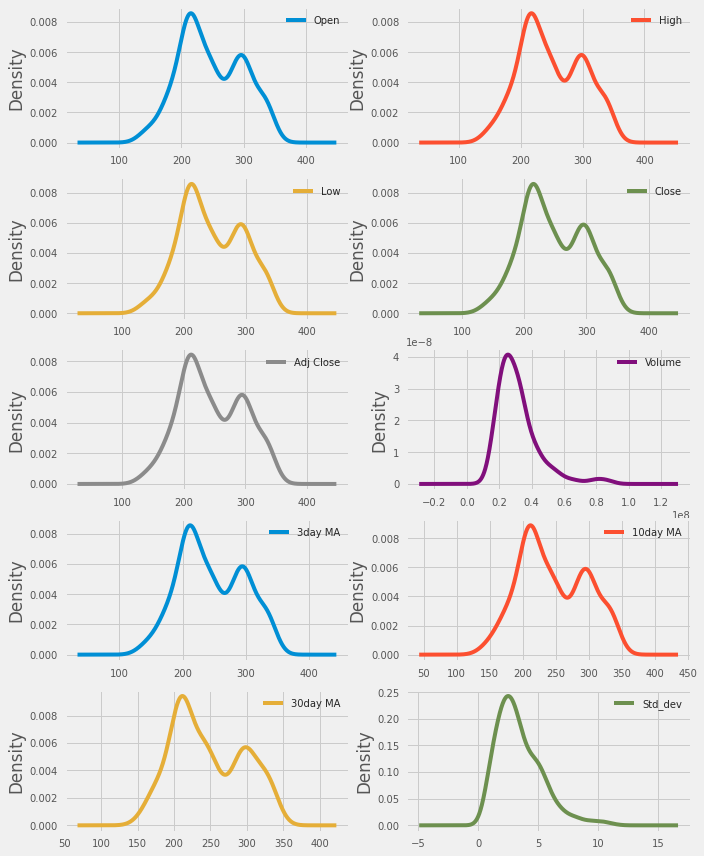

In [ ]:
names = columns_multi
df1.plot(kind='density', subplots=True, layout=(7,2), sharex=False)
plt.show()

In [ ]:
df1 = yf.download('TWL.L', start='2020-03-15', end='2022-03-15')
y = df1['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.148773
p-value: 0.000011
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


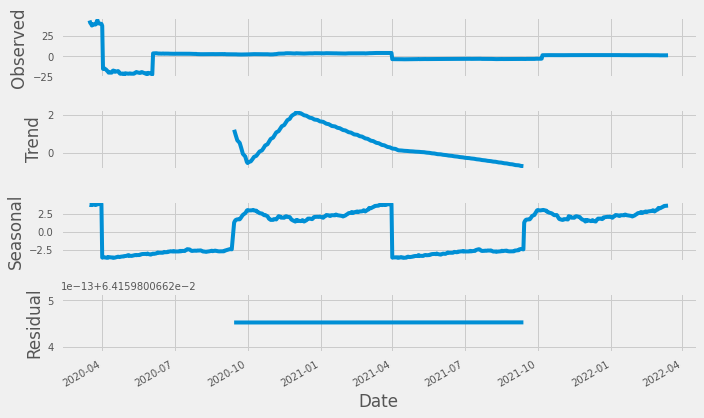

In [ ]:
import statsmodels.api
import statsmodels as sm

res = sm.tsa.seasonal.seasonal_decompose(y, model='additive', freq=252)
plt.rcParams["figure.figsize"] = (10,6)

resplot = res.plot()